In [1]:
%matplotlib inline 

import os
from cycler import cycler
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from parsing.argus_analysis import *

In [2]:
daemon_path = 'data/argusout/'
module_path = 'data/moduleout/'

In [3]:
basic_plot_params = {
   'axes.labelsize': 14,
   'font.size': 15,
   'legend.fontsize': 11,
   'legend.handlelength': 2,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [20, 20],
   'axes.prop_cycle': cycler('color', ['b', 'g', 'r', 'c', 'm', 'y', 'k']) +
                       cycler('linestyle', ['-', '--', ':', '-.', '-', '--', ':'])
}

plt.rcParams.update(basic_plot_params)

In [4]:
def hide_nth_xtick(ax, n):
    [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

In [5]:
def plot_daemon_stats(stats, node_names):
    fig = plt.figure()

    cpu = fig.add_subplot(321)
    mem = fig.add_subplot(322)
    failed = fig.add_subplot(323)
    received = fig.add_subplot(324)
    sent = fig.add_subplot(325)
    
    for node in node_names:
        cur_node = stats.get(node)
        cpu.set_ylabel('CPU usage')
        cpu.set_title('Percentage of CPU usage')

        mem.set_ylabel('Memory (in bytes)')
        mem.set_title('Active Memory usage')

        failed.set_ylabel('Puzzles')
        failed.set_title('Number of Puzzles Failed')

        received.set_ylabel('Puzzles')
        received.set_title('Number of Puzzles Received')

        sent.set_ylabel('Puzzles')
        sent.set_title('Number of Puzzles Sent')

        cpu.plot(cur_node['Timestamp'], cur_node['cpu_percent'],label=node,marker='s')
        mem.plot(cur_node['Timestamp'], cur_node['active_memory'],label=node,marker='s')
        failed.plot(cur_node['Timestamp'], cur_node['ChallengeFailed'],label=node,marker='s')
        received.plot(cur_node['Timestamp'], cur_node['ChallengeRecvd'],label=node,marker='s')
        sent.plot(cur_node['Timestamp'], cur_node['ChallengeSent'],label=node, marker='s')

    for plot in [cpu, mem, failed, received, sent]:
        plot.set_xlabel('Time')
        plot.yaxis.grid()
        plot.legend(loc = 9, ncol=10, bbox_to_anchor=(.5, -0.1), borderaxespad=1.0)
    
    fig.tight_layout(pad=1, h_pad=1.5)
    plt.show()

-1


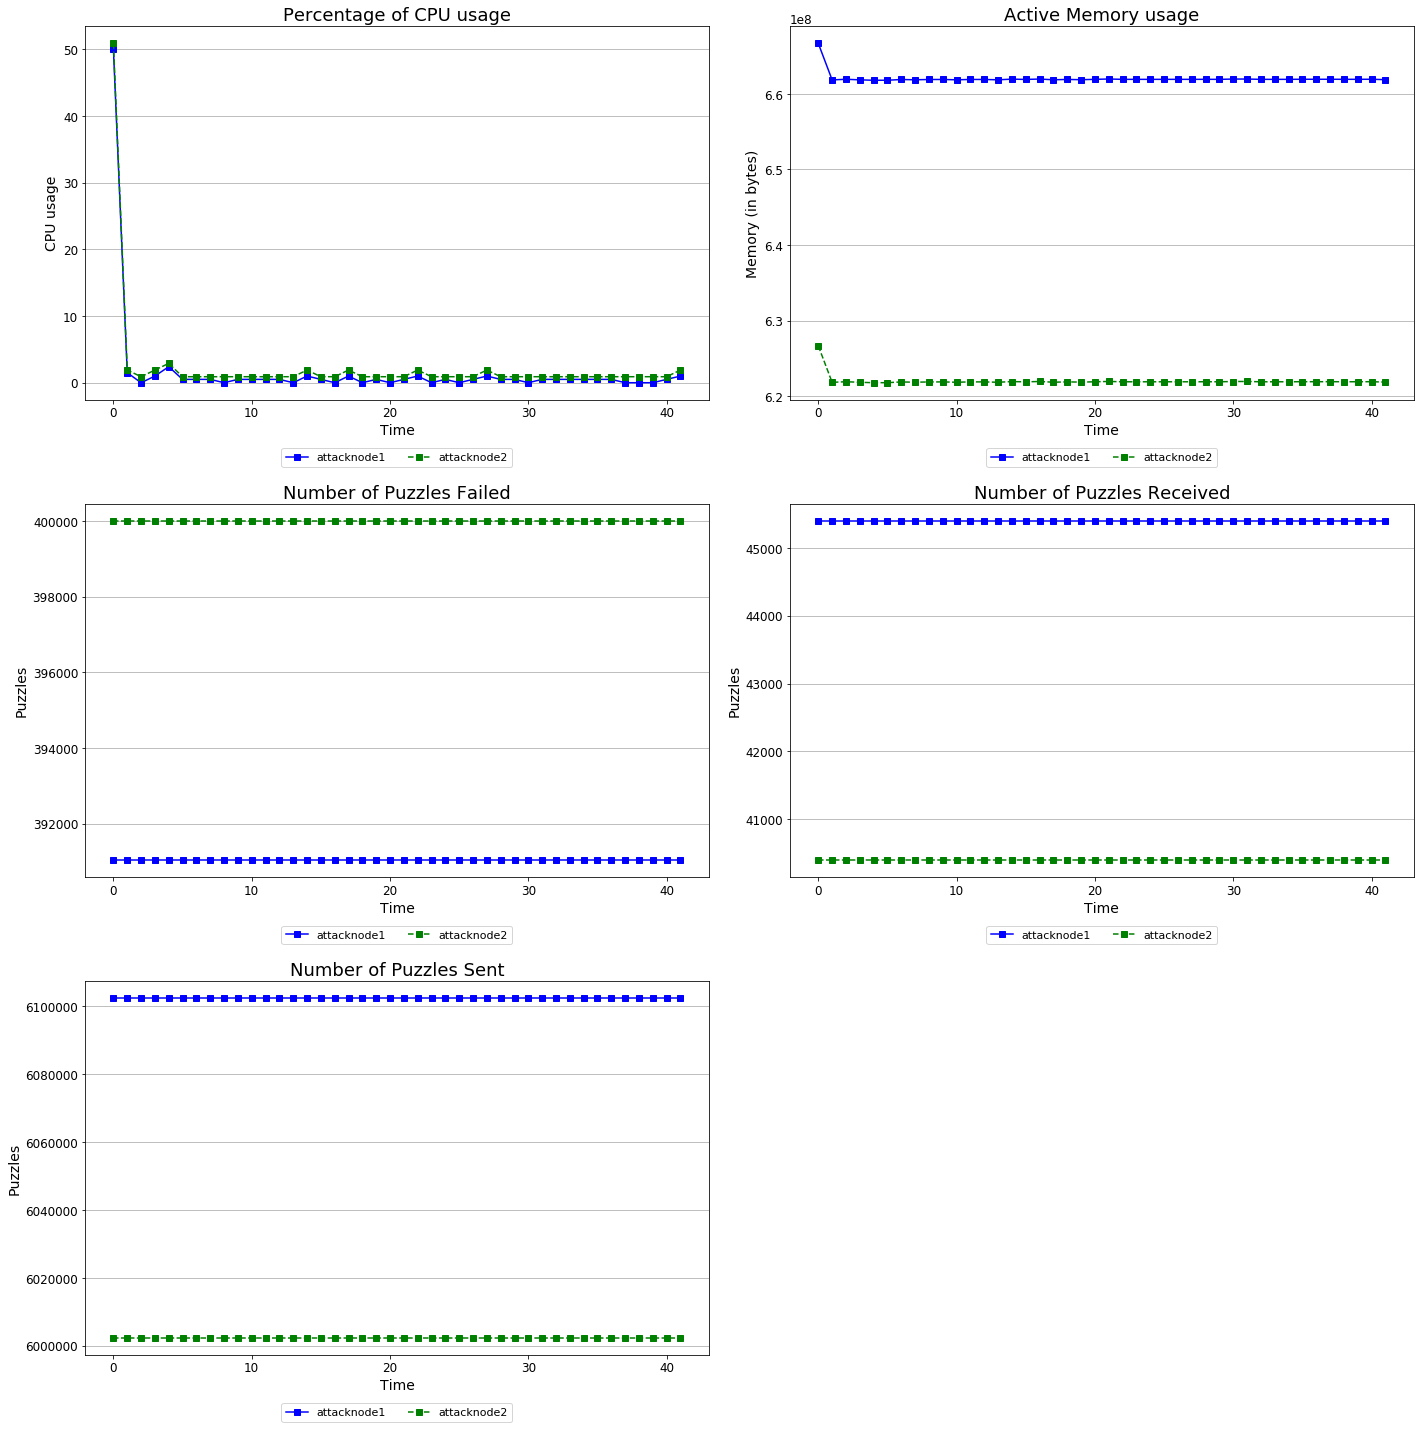

In [6]:
daemon_stats = {}
for filename in os.listdir(daemon_path):
    daemon_stats[filename.split('.txt')[0]], sample_rate = get_daemon_stats_from_file(daemon_path + filename)

print(sample_rate)
plot_daemon_stats(daemon_stats, [file.split('.txt')[0] for file in os.listdir(daemon_path)])

In [7]:
def plot_module_stats(stats, file_names):
    fig = plt.figure()

    listen_q = fig.add_subplot(211)
    accept_q = fig.add_subplot(212)
    for out_file in stats:
        queue = stats.get(out_file)
        listen_q.set_ylabel('Queue Size (in ?????)')
        listen_q.set_title('Listen Queue Size')

        accept_q.set_ylabel('Queue Size (in ?????)')
        accept_q.set_title('Accept Queue Size')

        listen_q.plot(queue['Timestamp'], queue['listen_q'], label=out_file)
        accept_q.plot(queue['Timestamp'], queue['accept_q'], label=out_file)

    for plot in [listen_q, accept_q]:
        plot.set_xlabel('Time')
        plot.legend(loc = 9, ncol=10, bbox_to_anchor=(.5, -0.08), borderaxespad=1.0)
        plot.yaxis.grid()
    
    fig.tight_layout(pad=1, h_pad=3.5)
    plt.show()

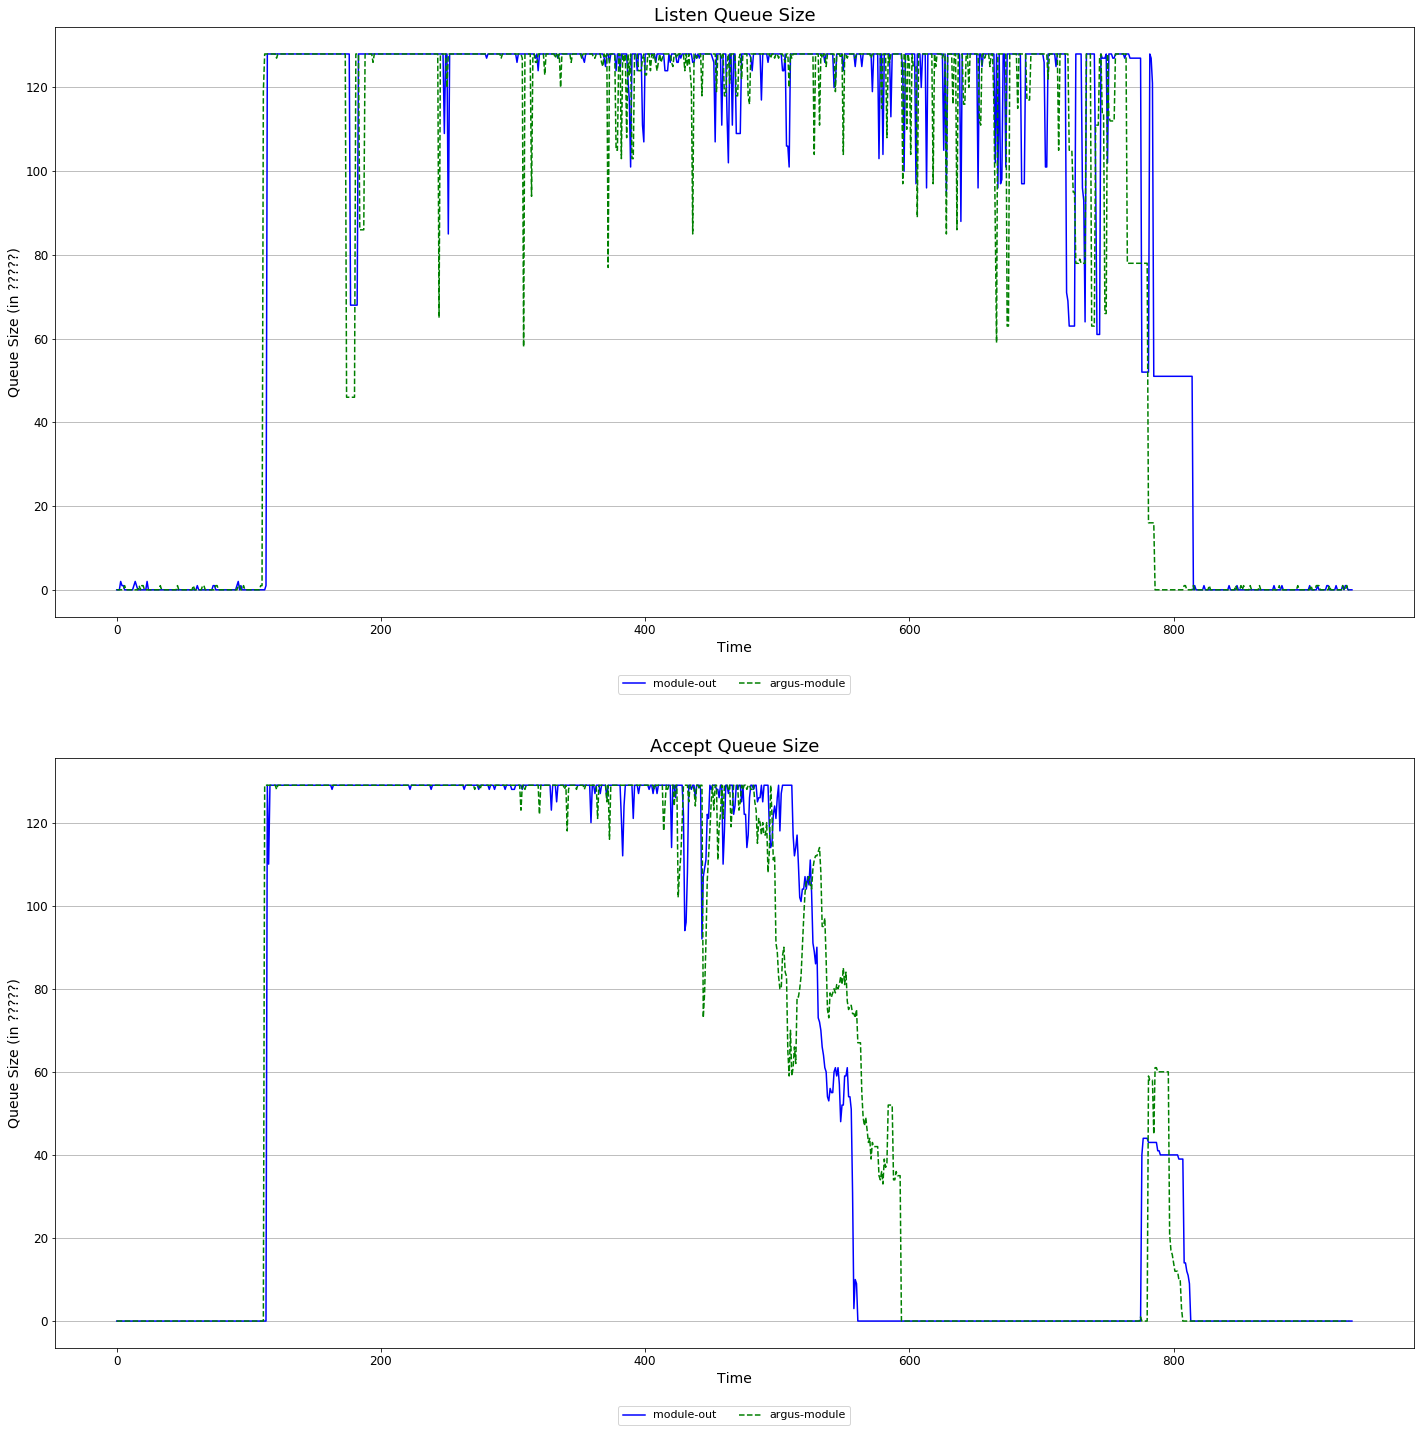

In [8]:
module_stats = {}
for filename in os.listdir(module_path):
    module_stats[filename.split('.txt')[0]] = get_module_stats_from_file(module_path + filename)
plot_module_stats(module_stats, [file.split('.txt')[0] for file in os.listdir(module_path)])